## Poisson Approach ##
A standard approach in betting is to use a poisson distribution to predict goals scored in games. A sensible apporach due to the nature of poisson distributions but of course also just a model.

In [1]:
#import
import pandas as pd
import math

#read our data
matches= pd.read_csv("data_21.csv")
import matplotlib.pyplot as plt

We now want to calculate the average goal rate. In order to ensure we dont use future info we'll use to 21/22 season to aquire the rate and use this to predict the 22/23 season. This should be equvilant to using the 22/23 to predicit the upcoming season

In [2]:
##A function to calculate the av goals of a team
total_goals=0
def calculate_avg_goals_per_game_scored(df, team_name):
    
    home_matches = df[(df['HomeTeam'] == team_name)]
    away_matches=df[(df['AwayTeam'] == team_name)]
    total_goals = home_matches['FTHG'].sum() + away_matches['FTAG'].sum()
    total_matches = home_matches.shape[0] +away_matches.shape[0]
    avg_goals_per_game = total_goals / total_matches
    return avg_goals_per_game

In [3]:
def poisson(goals, av):
    return (math.exp(-goals) * goals**av) / math.gamma(av+1)

In [4]:
poisson(3,calculate_avg_goals_per_game_scored(matches,"Man City"))

0.23299674652991278

In [5]:
def plot_poisson_distribution(inputs, lambd):
    probabilities = [math.exp(-lambd) * lambd**k / math.factorial(k) for k in inputs]
    plt.plot(inputs, probabilities, 'bo-')
    plt.xlabel('Number of goals')
    plt.ylabel('Probability')
    plt.title('Team goal likleyhood')
    plt.grid(False)
    plt.show()

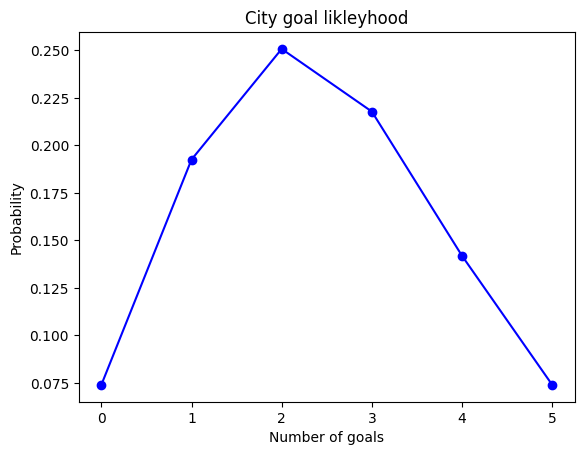

In [6]:
inputs = list(range(6)) 
plot_poisson_distribution(inputs, calculate_avg_goals_per_game_scored(matches,"Man City"))

In [9]:


# Get a list of unique entries in the 'Category' column
teams = matches['HomeTeam'].unique().tolist()

#apply the poisson analysis to each



In [10]:
av_goals_scored_dict = {item: calculate_avg_goals_per_game_scored(matches,item) for item in teams}

In [11]:
av_goals_scored_dict

{'Brentford': 1.263157894736842,
 'Man United': 1.5,
 'Burnley': 0.8947368421052632,
 'Chelsea': 2.0,
 'Everton': 1.131578947368421,
 'Leicester': 1.631578947368421,
 'Watford': 0.8947368421052632,
 'Norwich': 0.6052631578947368,
 'Newcastle': 1.1578947368421053,
 'Tottenham': 1.8157894736842106,
 'Liverpool': 2.473684210526316,
 'Aston Villa': 1.368421052631579,
 'Crystal Palace': 1.3157894736842106,
 'Leeds': 1.105263157894737,
 'Man City': 2.6052631578947367,
 'Brighton': 1.105263157894737,
 'Southampton': 1.131578947368421,
 'Wolves': 1.0,
 'Arsenal': 1.605263157894737,
 'West Ham': 1.5789473684210527}

## Do same for conceeded goals ##

In [12]:
##A function to calculate the toal goals conceeded
def calculate_avg_goals_per_game_conceeded(df, team_name):
    
    home_matches = df[(df['HomeTeam'] == team_name)]
    away_matches=df[(df['AwayTeam'] == team_name)]
    total_goals = home_matches['FTAG'].sum() + away_matches['FTHG'].sum()
    total_matches = home_matches.shape[0] +away_matches.shape[0]
    avg_goals_per_game = total_goals / total_matches
    return avg_goals_per_game


In [13]:
av_goals_conceeded_dict = {item: calculate_avg_goals_per_game_conceeded(matches,item) for item in teams}

In [14]:
av_goals_conceeded_dict

{'Brentford': 1.4736842105263157,
 'Man United': 1.5,
 'Burnley': 1.394736842105263,
 'Chelsea': 0.868421052631579,
 'Everton': 1.736842105263158,
 'Leicester': 1.5526315789473684,
 'Watford': 2.026315789473684,
 'Norwich': 2.210526315789474,
 'Newcastle': 1.631578947368421,
 'Tottenham': 1.0526315789473684,
 'Liverpool': 0.6842105263157895,
 'Aston Villa': 1.4210526315789473,
 'Crystal Palace': 1.2105263157894737,
 'Leeds': 2.0789473684210527,
 'Man City': 0.6842105263157895,
 'Brighton': 1.1578947368421053,
 'Southampton': 1.763157894736842,
 'Wolves': 1.131578947368421,
 'Arsenal': 1.263157894736842,
 'West Ham': 1.3421052631578947}

The number of goals scored by one team is obviously not independat of the team theyre playing, but in the interest of simplicity, lets calulcate as below.

In [39]:
def expected_goals (goals_dict,conceed_dict,home_team,away_team):
    scored=(goals_dict[home_team]+conceed_dict[away_team])/2
    conceed=(goals_dict[away_team]+conceed_dict[home_team])/2
    XtotalG = scored +conceed
    return XtotalG

In [30]:
expected_goals(av_goals_scored_dict,av_goals_conceeded_dict,"Man United", "Arsenal")

2.9342105263157894

Now for a particular upcoming game:

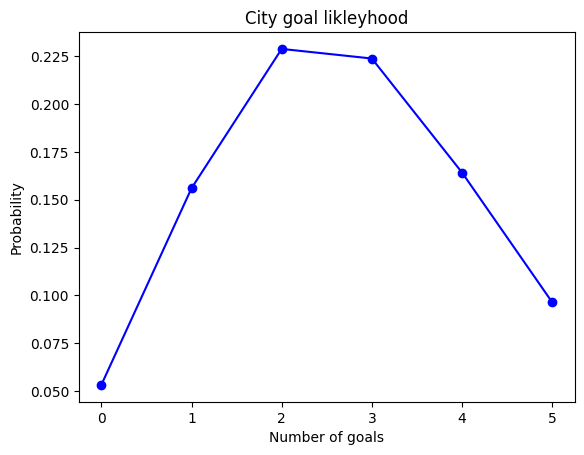

In [31]:
plot_poisson_distribution(inputs, expected_goals(av_goals_scored_dict,av_goals_conceeded_dict,"Man United", "Arsenal"))

In [36]:
def poisson_three_or_more(expected_goals):
    for k in range(2):
        probabilities = sum([math.exp(-expected_goals) * expected_goals**k / math.factorial(k) for k in inputs])
        XthreeOrMore=1-probabilities
        return XthreeOrMore

In [37]:
poisson_three_or_more(expected_goals(av_goals_scored_dict,av_goals_conceeded_dict,"Man United", "Arsenal"))

0.07743107826271123

In [38]:
poisson(expected_goals(av_goals_scored_dict,av_goals_conceeded_dict,"Man United", "Arsenal"),3)

0.22387784694217597